# Tutorial for running and analysing MBIPMs

## Notes

General conventions:
* Global variables are written in capitals, e.g. INITIAL_BIOMASS.
* The dimensions of the objects are indicated by the number of repeats of the first letter of the variable name

  e.g.
  
  `scalar = 1,`

  `vvector = [1, 2, ...],`
  
  `mmmatrix = [[1,2], [3,4]],`
  
  `ttttensor for dimensions > 2.`

In [ ]:
########################################
## COLAB CLONE REPOSITORY FROM GITHUB ##
########################################

## Note: only run this section if you are running the code in Google Colab and want to clone the repository from GitHub

## Clone GitHub repository and change work directory
!git clone https://github.com/willembonnaffe/mbipm
%cd mbipm

#
###

In [ ]:
##############################
## COLAB MOUNT GOOGLE DRIVE ##
##############################

## Note: only run this section if you are running the code in Google Colab and want to mount Google Drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/my-files/projects/yem # Change path to match local repository

#
###

In [1]:
##############
## INITIATE ##
##############

## Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import yaml

## Import modules
from f_YEM_V1_14_2025_10_10 import pdf
from f_YEM_V1_14_2025_10_10 import f_normal
from f_YEM_V1_14_2025_10_10 import YellowstoneEcosystemModel
from f_YEM_V1_14_2025_10_10 import plot_model

## Set the device to MPS if available
device = torch.device("mps" if torch.backends.mps.is_built() else "cpu")
print(device)

## Figure parameters
plt.rcParams['figure.dpi'] = 100
FIGSIZE = (6,4)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.facecolor':'whitesmoke'}
sns.set_theme(style="ticks", rc=custom_params)

## Font
PAPER_FORMATTING = False
if PAPER_FORMATTING == True:
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    plt.rcParams['font.size'] = 14
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.rm'] = 'Times New Roman'
    plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
    plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

#
###

mps


## Load and simulate the model

In [36]:
####################
## INITIATE MODEL ##
####################

## Model
model = YellowstoneEcosystemModel("parameters-aposteriori-V1-14-2025-10-13.yaml")

#
###

12.91s


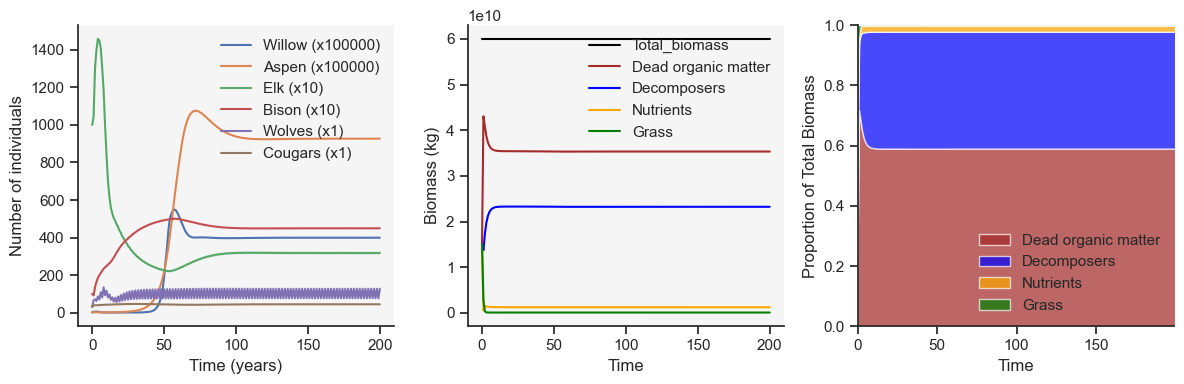

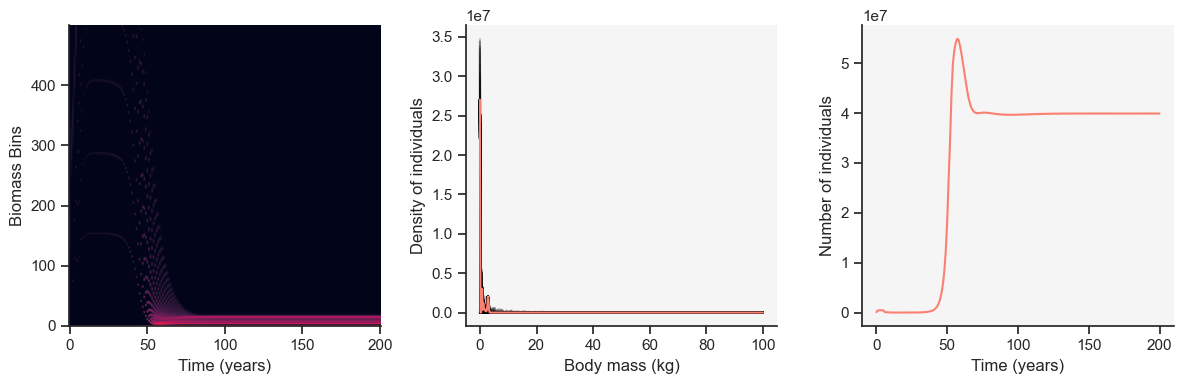

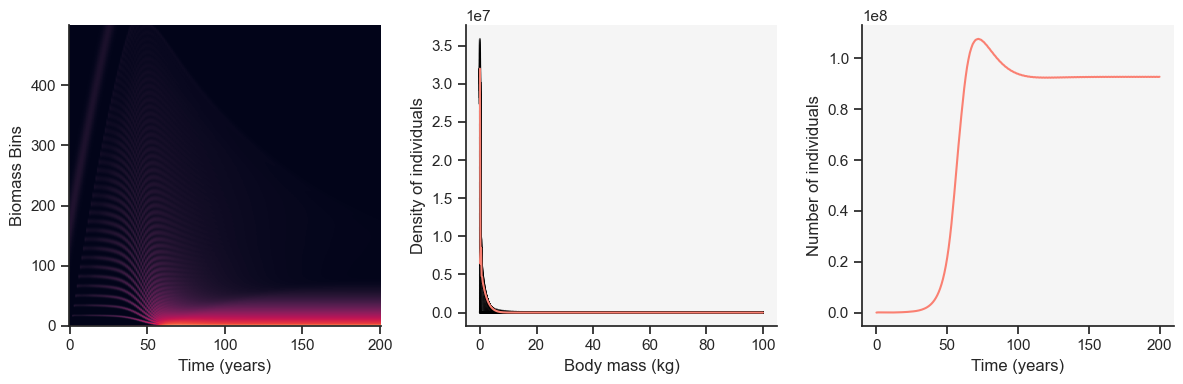

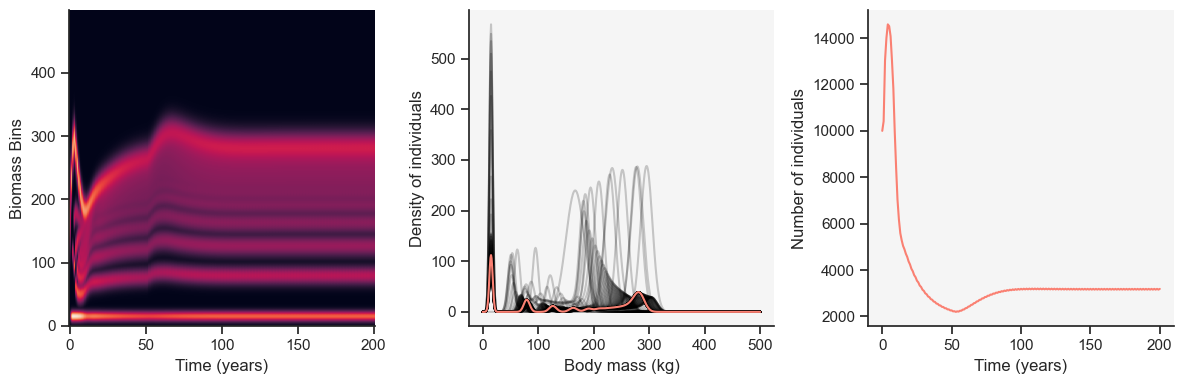

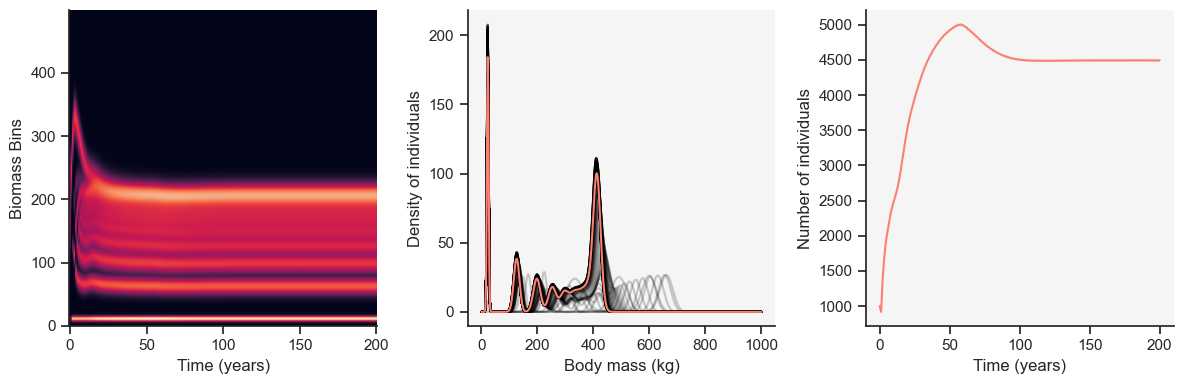

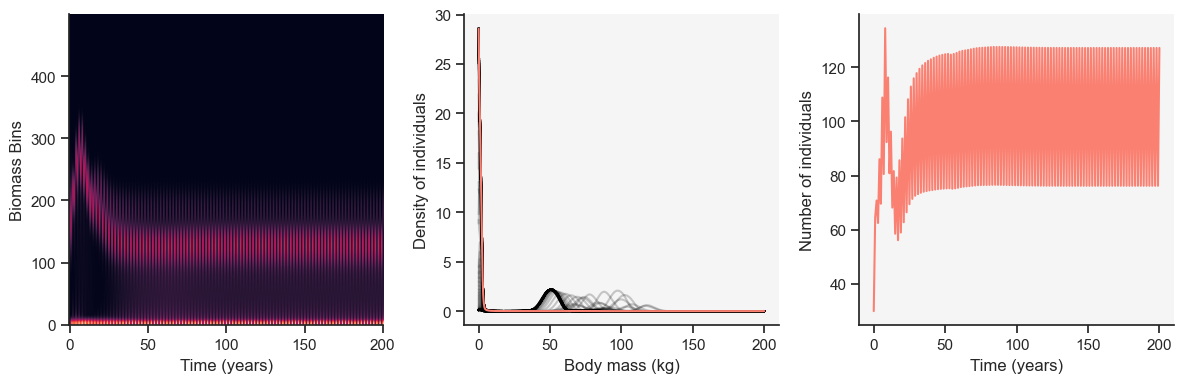

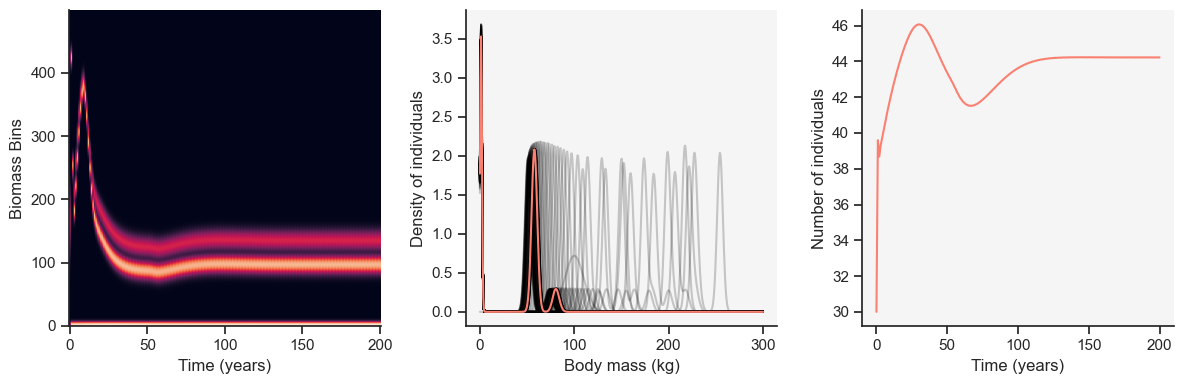

In [3]:
###############
## RUN MODEL ##
###############

## Initiate parameters
t_max = 200 # Maximum time of the simulation

## Hyperparameters
INITIAL_BIOMASS = torch.tensor(15*1e9, dtype=torch.float64) # Initial biomass in each unstructured compartment 
IINITIAL_POPULATION_SIZES = torch.tensor([1*100000, 1*100000, 1*10000, 1*1000, 1*30, 1*30], dtype=torch.float64)
ZZMAX = torch.tensor([100, 100, 500, 1000, 200, 300], dtype=torch.float64) # Maximum phenotype values (kg) for each species (i.e. willow, aspen, elk, bison, wolves, cougars)
ZZZ_LEN = 500 # Length of phenotype vector

## Simulation
t0 = time.time()
predictions = model.simulate(t_max=t_max,
                             Dt = INITIAL_BIOMASS, # Biomass of organic matter at t = 0
                             Bt = INITIAL_BIOMASS, # Biomass of decomposers at t = 0
                             Pt = INITIAL_BIOMASS, # Biomass of nutrients at t = 0
                             Gt = INITIAL_BIOMASS, # Biomass of grass at t = 0
                             NNt = IINITIAL_POPULATION_SIZES, # Initial population sizes
                             zzmax = ZZMAX,
                             zzz_len = ZZZ_LEN
                            )
#
## Collect results (time series of variables)
zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions
# dim(XXt) = (times)
# dim(NNNt) = (times, species)
# dim(NNNzt) = (times, species, phenotype)
tf = time.time()
print(f"{tf-t0:.2f}s")

## Visualise
plot_model(predictions)

#
###

In [4]:
####################################
## FORMAT PREDICTIONS FOR FIGURES ##
####################################

## Format output (time, species, phenotype) --> (species, time, phenotype)
zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions
NNNNzt_new = []
for i in range(6):
    NNNzt_new = []
    for NNNzt in NNNNzt:
        NNNzt_new += [NNNzt[i].clone()]
    NNNNzt_new += [torch.stack(NNNzt_new)]
NNNNzt = torch.stack(NNNNzt_new)

#
###

## Change parameters

In [5]:
#############################
## ACCESS MODEL PARAMETERS ##
#############################

## Check parameter values
print(model.ddelta)
ddelta = model.ddelta # To save initial parameters

## Change values, e.g. 
model.ddelta = model.ddelta * 1.1
print(model.ddelta)

## Reset values
model.ddelta = ddelta
print(model.ddelta)

#
###

tensor([0.3113, 0.0347, 0.9119, 1.1339, 7.4235, 3.9801], dtype=torch.float64)
tensor([0.3424, 0.0382, 1.0031, 1.2473, 8.1659, 4.3781], dtype=torch.float64)
tensor([0.3113, 0.0347, 0.9119, 1.1339, 7.4235, 3.9801], dtype=torch.float64)


In [37]:
#################
## MODEL SETUP ##
#################

## Initiate parameters
t_max = 50 # Maximum time of the simulation

## Hyperparameters
INITIAL_BIOMASS = torch.tensor(15*1e9, dtype=torch.float64) # Initial biomass in each unstructured compartment 
IINITIAL_POPULATION_SIZES = torch.tensor([1*100000, 1*100000, 0*10000, 0*1000, 0*30, 0*30], dtype=torch.float64)
ZZMAX = torch.tensor([100, 100, 500, 1000, 200, 300], dtype=torch.float64) # Maximum phenotype values (kg) for each species (i.e. willow, aspen, elk, bison, wolves, cougars)
ZZZ_LEN = 500 # Length of phenotype vector

#
###

In [47]:
#######################
## PARAMETERS SWEEPS ##
#######################

## Model
model = YellowstoneEcosystemModel("parameters-aposteriori-V1-14-2025-10-13.yaml")

## Parameter scaling
PARAMETER_ANCHOR = model.ggamma_1[0].clone() # model.phi_DB
print(PARAMETER_ANCHOR)

tensor(620.0444, dtype=torch.float64)


In [48]:
## Collect 
SSCALING = [0.0, 0.5, 1.0, 1.5,  2.0]
ppredictions = []
for scaling in SSCALING:

    ## Change parameter
    model.ggamma_1[0] = PARAMETER_ANCHOR * scaling
    print(model.ggamma_1[0])
           
    ## Simulation
    t0 = time.time()
    predictions = model.simulate(t_max=t_max, 
                                 Dt = INITIAL_BIOMASS, Bt = INITIAL_BIOMASS, 
                                 Pt = INITIAL_BIOMASS, Gt = INITIAL_BIOMASS, 
                                 NNt = IINITIAL_POPULATION_SIZES, 
                                 zzmax = ZZMAX, zzz_len = ZZZ_LEN)    
    zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions
    tf = time.time()
    print(f"{tf-t0:.2f}s")

    ## Store predictions
    ppredictions += [NNNt]        
    
#
###

tensor(0., dtype=torch.float64)
0.84s
tensor(310.0222, dtype=torch.float64)
1.06s
tensor(620.0444, dtype=torch.float64)
1.22s
tensor(930.0666, dtype=torch.float64)
1.03s
tensor(1240.0888, dtype=torch.float64)
0.83s


# Sensitivity analysis

In this section of the code we test the change in elk dynamics with increasing biomass consumption by decomposers.

The equation is
$\int N(z,t) dz$.

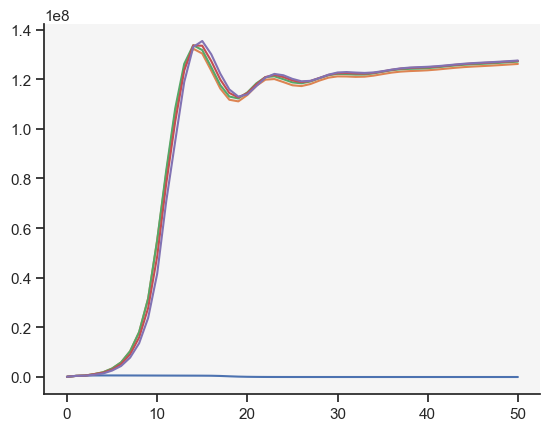

In [49]:
###########################
## VISUALISE SENSITIVITY ##
###########################

## Convert to tensor
time_series_sensitivity = torch.stack(ppredictions)
time_series_sensitivity = torch.transpose(time_series_sensitivity, 1, 0)

## Visualise
plt.plot(time_series_sensitivity[:,:,0])
plt.show()

#
###

In [21]:
print(time_series_sensitivity[200,0,0])
print(time_series_sensitivity[200,1,0])

tensor(1.3288e+08, dtype=torch.float64)
tensor(1.3288e+08, dtype=torch.float64)


## Simulate from equilibrium

In [10]:
######################
## FIND EQUILIBRIUM ##
######################

## Initiate parameters
t_max_0 = 500
t_max_1 = 500

## Period 0
t0 = time.time()
predictions_0 = model.simulate(t_max=t_max_0, 
                             Dt = INITIAL_BIOMASS, Bt = INITIAL_BIOMASS, 
                             Pt = INITIAL_BIOMASS, Gt = INITIAL_BIOMASS, 
                             NNt = IINITIAL_POPULATION_SIZES, 
                             zzmax = ZZMAX, zzz_len = ZZZ_LEN)    
zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions_0
tf = time.time()
print(f"{tf-t0:.2f}s")

## Save initial conditions
zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions_0
Dt_0 = DDt[-1].clone().detach()
Bt_0 = BBt[-1].clone().detach()
Pt_0 = PPt[-1].clone().detach()
Gt_0 = GGt[-1].clone().detach()
NNt_0 = NNNt[-1].clone().detach()
NNNzt_0 = NNNNzt[-1].clone().detach()

#
###

25.53s


27.11s


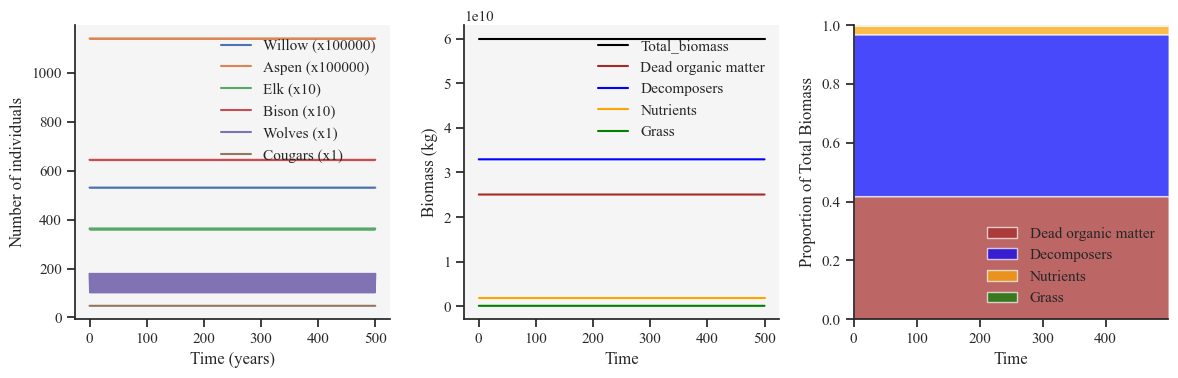

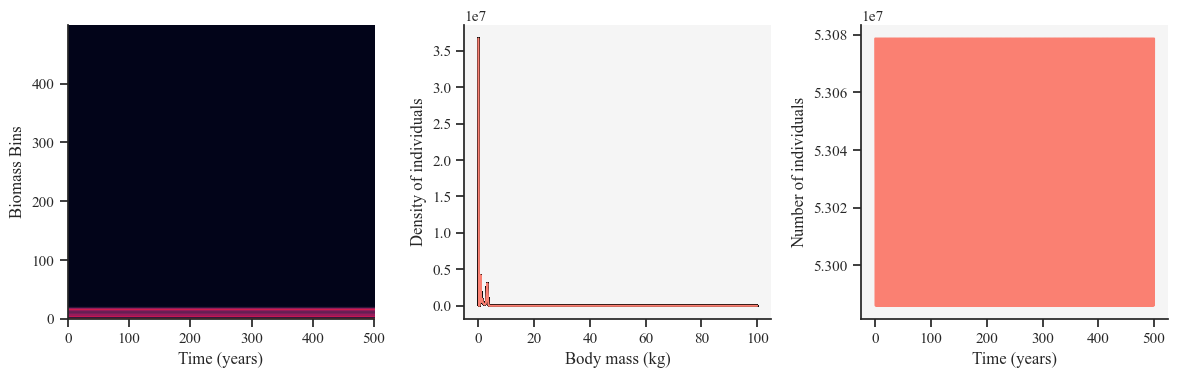

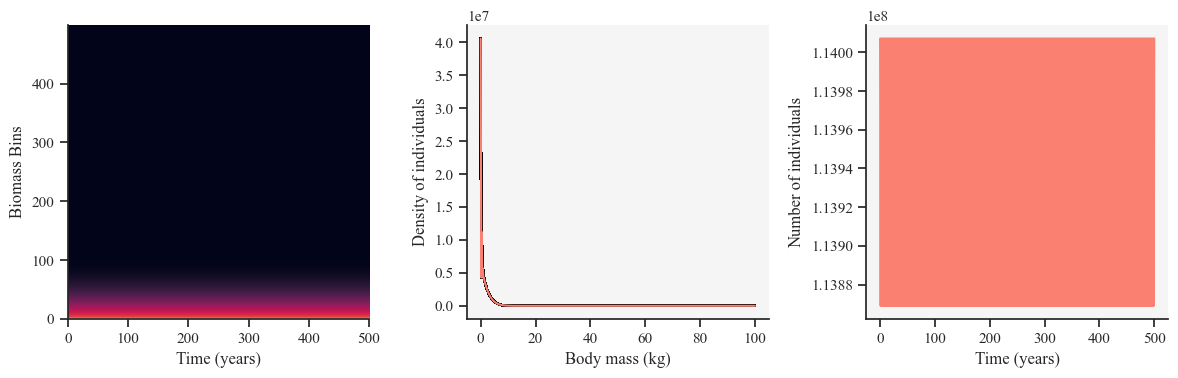

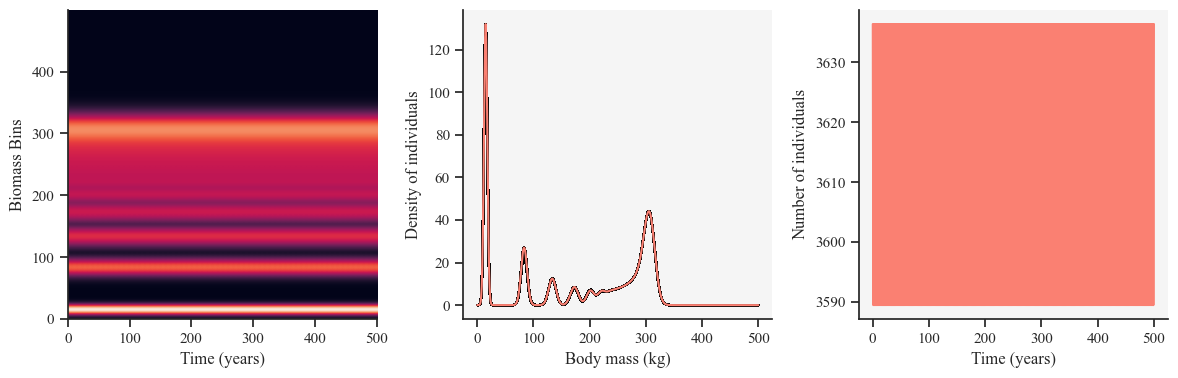

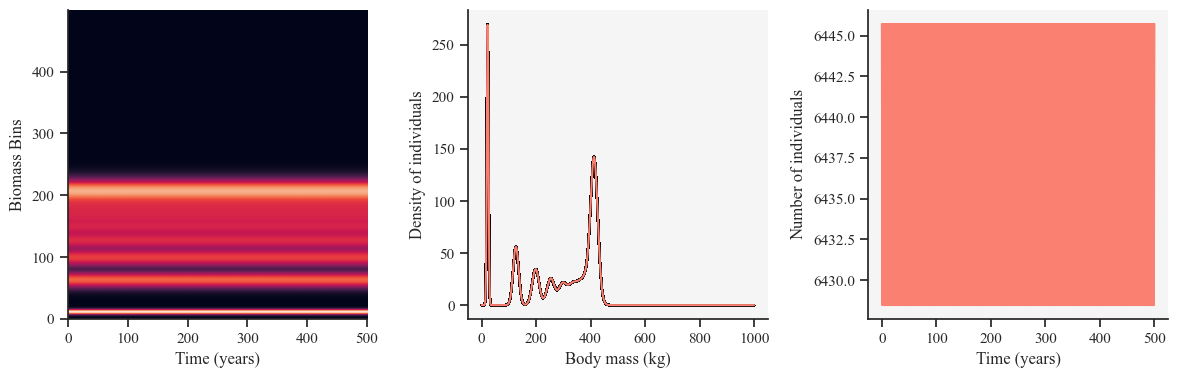

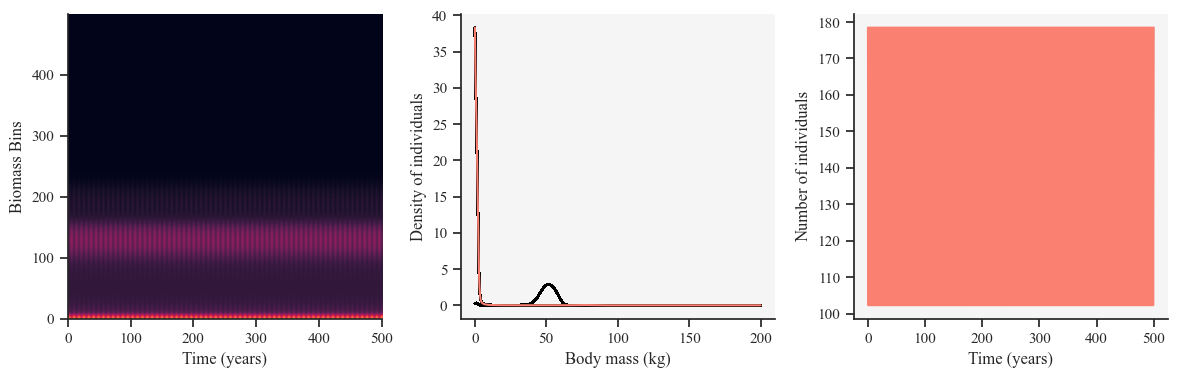

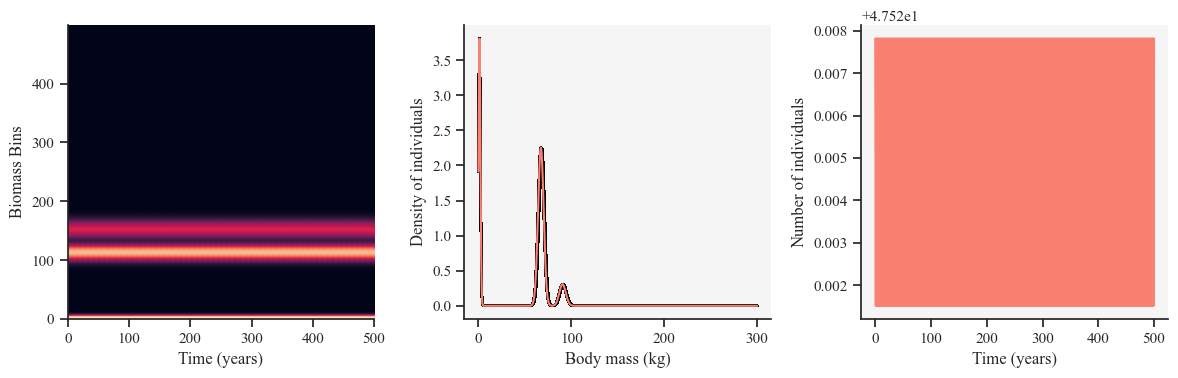

In [11]:
###############################
## SIMULATE FROM EQUILIBRIUM ##
###############################

## Period 1
t0 = time.time()
predictions_1 = model.simulate(t_max=t_max_1,
                             Dt = Dt_0,
                             Bt = Bt_0,
                             Pt = Pt_0,
                             Gt = Gt_0,
                             NNt = NNt_0,
                             NNNzt = NNNzt_0,
                             zzmax = ZZMAX,
                             zzz_len = ZZZ_LEN
                            )
zzz, tt, DDt, BBt, PPt, GGt, NNNt, NNNNzt, ttotal_biomass = predictions_1
tf = time.time()
print(f"{tf-t0:.2f}s")

## Visualise
plot_model(predictions_1)

#
###